In [1]:
from math import sqrt

from skimage.feature import blob_doh
from skimage.color import rgb2gray
from skimage.io import imread as ir
from skimage.io import imshow

import matplotlib.pyplot as plt

import numpy as np
import cv2

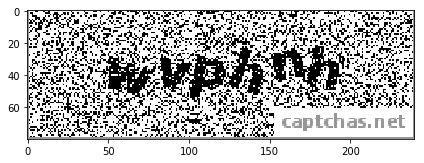

In [2]:
%matplotlib inline
image = ir('test_CAPTCHA.png', as_grey=True)
imshow(image)

In [3]:
blob_detect = blob_doh(image,min_sigma=5,max_sigma=30)

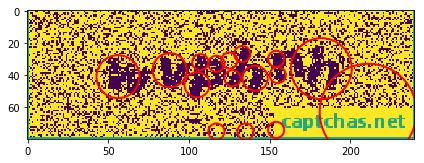

In [4]:
fig, ax = plt.subplots()

ax.imshow(image,interpolation='nearest')
for blob in blob_detect:
    y, x, r = blob
    c = plt.Circle((x,y),r, color='r',linewidth=2,fill=False)
    ax.add_artist(c)
#     print(c)

plt.tight_layout()
plt.show()

In [5]:
import cv2

In [6]:
cv_im = cv2.imread('test_CAPTCHA.png')
imgray = cv2.cvtColor(cv_im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [7]:
cnt = contours[0]
cv2.drawContours(im2, [cnt], 0, (0,255,0), 1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255,   0, ..., 255, 255,   0],
       ..., 
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [8]:
cv2.imshow('no contours',imgray)

cv2.imshow('contours',im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
cv2.destroyAllWindows()

In [10]:
contours

[array([[[  0,   0]],
 
        [[  0,  79]],
 
        [[239,  79]],
 
        [[239,   0]]], dtype=int32), array([[[147,  78]],
 
        [[148,  77]],
 
        [[149,  78]],
 
        [[148,  79]]], dtype=int32), array([[[140,  78]],
 
        [[141,  77]],
 
        [[142,  78]],
 
        [[141,  79]]], dtype=int32), array([[[120,  78]],
 
        [[121,  77]],
 
        [[122,  78]],
 
        [[121,  79]]], dtype=int32), array([[[113,  78]],
 
        [[114,  77]],
 
        [[115,  78]],
 
        [[114,  79]]], dtype=int32), array([[[ 99,  78]],
 
        [[100,  77]],
 
        [[101,  78]],
 
        [[100,  79]]], dtype=int32), array([[[96, 78]],
 
        [[97, 77]],
 
        [[98, 78]],
 
        [[97, 79]]], dtype=int32), array([[[94, 78]],
 
        [[95, 77]],
 
        [[96, 78]],
 
        [[95, 79]]], dtype=int32), array([[[92, 78]],
 
        [[93, 77]],
 
        [[94, 78]],
 
        [[93, 79]]], dtype=int32), array([[[78, 78]],
 
        [[79, 77]],
 
        

## Using new captcha format

In [11]:
import os


In [20]:
image_names = os.listdir('./samples/_10samples')
image_list = []
for image_name in image_names:
    image_list.append(ir('./samples/_10samples/%s'%image_name,as_grey=True))

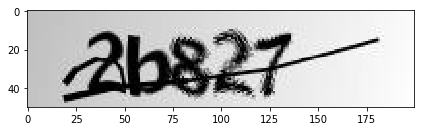

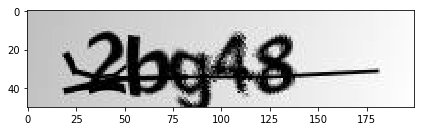

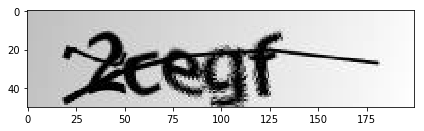

In [28]:
%matplotlib inline
for image in image_list[0:3]:
    imshow(image)
    plt.show()

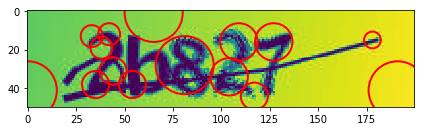

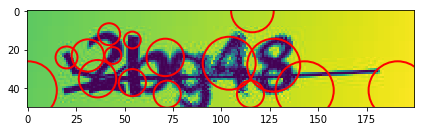

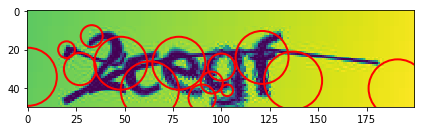

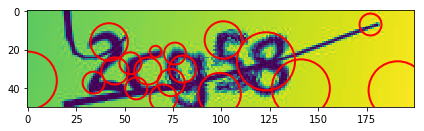

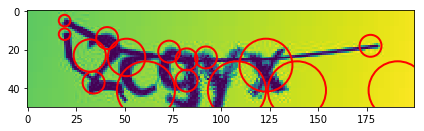

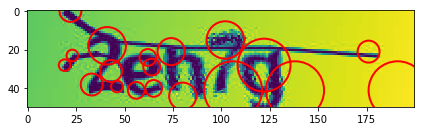

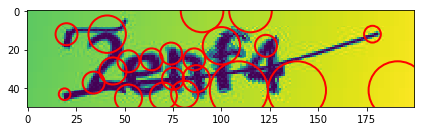

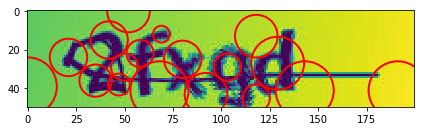

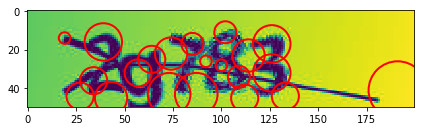

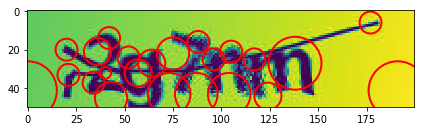

In [31]:
for image in image_list:
    blob_detect = blob_doh(image,min_sigma=3,max_sigma=15)    
    fig, ax = plt.subplots()

    ax.imshow(image,interpolation='nearest')
    for blob in blob_detect:
        y, x, r = blob
        c = plt.Circle((x,y),r, color='r',linewidth=2,fill=False)
        ax.add_artist(c)
    #     print(c)

    plt.tight_layout()
    plt.show()

In [2]:
import numpy as np
import cv2

In [135]:
%matplotlib inline
image = cv2.imread('test_CAPTCHA.png',0)
cv2.imshow('original',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [136]:
image = cv2.bitwise_not(image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
sizes = stats[1:, -1]
nb_components = nb_components - 1

In [137]:
min_size = 100


for i in range(0, nb_components):
    if sizes[i] <= min_size:
        image[output == i + 1] = 0
        
# image = cv2.bitwise_not(image)

In [138]:
cv2.imshow('new',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [139]:
edge = 16
inv_cropped = image[edge:image.shape[0]-edge,edge:image.shape[1]-edge]
new_image, letters_only_contour, hierarchy = cv2.findContours(inv_cropped,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
letters_list = []
cropped = cv2.bitwise_not(inv_cropped)
# append letters to list.  following code detects unually long letters, and assumes the contour found multiple letters
# splits such contours in half until it's a reasonable length
for cnt in letters_only_contour:
    x,y,w,h = cv2.boundingRect(cnt)
    temp_width = w
    while temp_width > 40:
        temp_width = np.floor_divide(temp_width,2)
    for i in range(np.floor_divide(w,temp_width)):
        letters_list.append(cropped[y:y+h,x+i*temp_width:x+(i+1)*temp_width])

In [140]:
for letter in letters_list:
        cv2.imshow('letters only',letter)
        cv2.waitKey(0)
        cv2.destroyAllWindows() 

In [107]:
# new_image = cv2.bitwise_not(new_image)
cv2.imshow('new?',cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [108]:
x,y,w,h = cv2.boundingRect(letters_only_contour[0])

0

## Using old format, but cutting out noise

In [73]:
image = cv2.imread('test_CAPTCHA.png',0)
ret,thresh = cv2.threshold(image,254,255,0)
cv2.imshow('threshold?',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

In [75]:
contour_areas = []
main_blob = 0
new_image = np.zeros((im2.shape))
for cnt in contours:
    ca = cv2.contourArea(cnt)
    contour_areas.append(ca)
    if ca > 100:
        cv2.drawContours(new_image,[cnt],-1,255) 
        


In [81]:

cv2.imshow('new?',new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Previous 4 cells actually work

In [84]:
edge = 16
cropped = new_image[edge:new_image.shape[0]-edge,edge:new_image.shape[1]-edge]
cv2.imshow('dropped border',cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [106]:
cropped =cv2.convertScaleAbs(cropped)
# cropped.dtype
ret,thresh = cv2.threshold(cropped,254,255,0)
image, letters_only_contour, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
letters_list = []
for cnt in letters_only_contour:
    x,y,w,h = cv2.boundingRect(cnt)
    temp_width = w
    while temp_width > 27:
        temp_width = np.floor_divide(temp_width,2)
    for i in range(np.floor_divide(w,temp_width)):
        letters_list.append(cropped[y:y+h,x+i*temp_width:x+(i+1)*temp_width])
# x,y,w,h = cv2.boundingRect(letters_only_contour[0])

In [107]:
for letter in letters_list:
    cv2.imshow('letters only',letter)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Pull letters in function

In [110]:
import numpy as np
import cv2

In [119]:
def get_letters_list(im_name):
    # read image, convert to black and white
    image = cv2.imread(im_name,0)
    ret,thresh = cv2.threshold(image,254,255,0)
    image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    # create new image (all black), and draw only large contours (all white)
    # result is therefore color inverted
    new_image = np.zeros((image.shape))
    for cnt in contours:
        ca = cv2.contourArea(cnt)
        if ca > 100:
            cv2.drawContours(new_image,[cnt],-1,255)
    # drop edges to minimize noise
    edge = 16
    cropped = new_image[edge:new_image.shape[0]-edge,edge:new_image.shape[1]-edge]
    # convert to usable cv2 format, then rerun contour detection
    cropped =cv2.convertScaleAbs(cropped)
    ret,thresh = cv2.threshold(cropped,254,255,0)
    image, letters_only_contour, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    letters_list = []
    # append letters to list.  following code detects unually long letters, and assumes the contour found multiple letters
    # splits such contours in half until it's a reasonable length
    for cnt in letters_only_contour:
        x,y,w,h = cv2.boundingRect(cnt)
        temp_width = w
        while temp_width > 27:
            temp_width = np.floor_divide(temp_width,2)
        for i in range(np.floor_divide(w,temp_width)):
            letters_list.append(cropped[y:y+h,x+i*temp_width:x+(i+1)*temp_width])
    return letters_list

In [112]:
test = get_letters_list('test_CAPTCHA.png')

In [113]:
for letter in test:
    cv2.imshow('letters only',letter)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Test from test images

In [131]:
import os

In [227]:
image_list = os.listdir('grainy_samples/_10samples')
for image_name in image_list:
    letters_list = get_letters_list2('grainy_samples/_10samples/%s'%image_name)
    for letter in letters_list:
        cv2.imshow('letters only',letter)
        cv2.waitKey(0)
        cv2.destroyAllWindows()    

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


# Pull letters in function v2

In [225]:
def get_letters_list2(im_name):
    image = cv2.imread(im_name,0)
    image = cv2.bitwise_not(image)
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
    sizes = stats[1:, -1]
    nb_components = nb_components - 1
    min_size = 100
    for i in range(0, nb_components):
        if sizes[i] <= min_size:
            image[output == i + 1] = 0
    edge = 16
    inv_cropped = image[edge:image.shape[0]-edge,edge:image.shape[1]-edge]
    new_image, letters_only_contour, hierarchy = cv2.findContours(inv_cropped,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    letters_list = []
    cropped = cv2.bitwise_not(inv_cropped)
    # append letters to list.  following code detects unually long letters, and assumes the contour found multiple letters
    # splits such contours in half until it's a reasonable length
    for cnt in letters_only_contour:
        x,y,w,h = cv2.boundingRect(cnt)
        temp_width = w
        while temp_width > 40:
            temp_width = np.floor_divide(temp_width,2)
        for i in range(np.floor_divide(w,temp_width)):
            letters_list.append(cropped[y:y+h,x+i*temp_width:x+(i+1)*temp_width])
    while len(letters_list)<6:
        letter_widths = []
        for letter in letters_list:
            letter_widths.append(letter.shape[1])
        widest_letter_index = letter_widths.index(max(letter_widths))
        widest_letter = letters_list[widest_letter_index]
        letters_list.remove(widest_letter)
        letters_list.insert(widest_letter_index,widest_letter[:,np.floor_divide(widest_letter.shape[1],2):])
        letters_list.insert(widest_letter_index,widest_letter[:,0:np.floor_divide(widest_letter.shape[1],2)])
    if len(letters_list)>6:
        return ('An error has occurred.  Too many letters detected',letters_list)
    else:
        return letters_list

In [222]:
image = cv2.imread('grainy_samples/_10samples/mhmoqu.jpg',0)
image = cv2.bitwise_not(image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
sizes = stats[1:, -1]
nb_components = nb_components - 1
min_size = 100
for i in range(0, nb_components):
    if sizes[i] <= min_size:
        image[output == i + 1] = 0
edge = 16
inv_cropped = image[edge:image.shape[0]-edge,edge:image.shape[1]-edge]
new_image, letters_only_contour, hierarchy = cv2.findContours(inv_cropped,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
letters_list = []
cropped = cv2.bitwise_not(inv_cropped)
# append letters to list.  following code detects unually long letters, and assumes the contour found multiple letters
# splits such contours in half until it's a reasonable length
for cnt in letters_only_contour:
    x,y,w,h = cv2.boundingRect(cnt)
    temp_width = w
    while temp_width > 44:
        temp_width = np.floor_divide(temp_width,2)
    for i in range(np.floor_divide(w,temp_width)):
        letters_list.append(cropped[y:y+h,x+i*temp_width:x+(i+1)*temp_width])

In [196]:
letter_widths = []
for letter in letters_list:
    letter_widths.append(letter.shape[1])
widest_letter_index = letter_widths.index(max(letter_widths))
widest_letter = letters_list[widest_letter_index]
letters_list.remove(widest_letter)
letters_list.insert(widest_letter_index,widest_letter[:,np.floor_divide(widest_letter.shape[1],2):])
letters_list.insert(widest_letter_index,widest_letter[:,0:np.floor_divide(widest_letter.shape[1],2)])

In [224]:
for letter in letters_list:
    cv2.imshow('letters only',letter)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [223]:
len(letters_list)

5

In [190]:
letter_widths

[30, 23, 24, 24, 23, 23]

In [217]:
image_name

'mhmoqu.jpg'